In [ ]:
# @title
# Create a balanced dummy dataset of ~1200 records with education, lifestyle, demographic,
# socioeconomic, and clinical features, then save as CSV for user download.

import pandas as pd
import numpy as np

np.random.seed(42)

n = 1200

data = {
    "Age": np.random.randint(30, 70, n),
    "Gender": np.random.choice([0, 1], n),  # 0=female, 1=male
    "Education_Level": np.random.choice([0, 1, 2, 3], n),  # 0=primary,1=secondary,2=graduate,3=postgrad
    "Annual_Income": np.random.randint(100000, 1200000, n),
    "Employment_Status": np.random.choice([0, 1], n),  # 0=unemployed,1=employed
    "Smoking": np.random.choice([0, 1], n),
    "Alcohol": np.random.choice([0, 1], n),
    "Physical_Activity": np.random.choice([0, 1, 2], n),  # low/mod/high
    "BMI": np.round(np.random.normal(26, 4, n), 1),
    "Blood_Pressure": np.random.randint(110, 160, n),
    "Cholesterol": np.random.randint(160, 260, n),
    "Glucose": np.random.randint(70, 160, n),
}

df = pd.DataFrame(data)

# Create balanced target
df["Heart_Disease"] = np.array([0]*600 + [1]*600)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the file to the Colab environment's default directory
path = "dummy_education_heart_disease_1200.csv"
df.to_csv(path, index=False)

path

'dummy_education_heart_disease_1200.csv'

In [1]:

import pandas as pd
import numpy as np

np.random.seed(42)
n = 1200

df = pd.DataFrame({
    "Age": np.random.randint(30, 70, n),
    "Gender": np.random.choice([0, 1], n), # 1 for male and 0 for female
    "Education_Level": np.random.choice([0, 1, 2, 3], n, p=[0.25, 0.35, 0.25, 0.15]),
    "Annual_Income": np.random.randint(100000, 1200000, n),
    "Employment_Status": np.random.choice([0, 1], n, p=[0.2, 0.8]),
    "Smoking": np.random.choice([0, 1], n, p=[0.65, 0.35]),
    "Alcohol": np.random.choice([0, 1], n, p=[0.7, 0.3]),
    "Physical_Activity": np.random.choice([0, 1, 2], n, p=[0.3, 0.4, 0.3]),
    "BMI": np.round(np.random.normal(26, 4, n), 1),
    "Blood_Pressure": np.random.randint(110, 170, n),
    "Cholesterol": np.random.randint(160, 280, n),
    "Glucose": np.random.randint(70, 180, n),
})

# ---- Risk Score (REALISTIC LOGIC) ----
risk_score = (
    0.03 * df["Age"] +
    0.04 * df["Blood_Pressure"] +
    0.03 * df["Cholesterol"] +
    0.03 * df["Glucose"] +
    0.05 * df["BMI"] +
    0.8 * df["Smoking"] -
    0.6 * df["Physical_Activity"] -
    0.5 * df["Education_Level"]
)

# Convert risk score to probability
prob = 1 / (1 + np.exp(- (risk_score - np.mean(risk_score)) / 10))

df["Heart_Disease"] = (prob > np.median(prob)).astype(int)

# Balance dataset
df = df.groupby("Heart_Disease").sample(600, random_state=42)

df.to_csv("dummy_education_heart_disease.csv", index=False)

print(df["Heart_Disease"].value_counts())
print(df.columns)


Heart_Disease
0    600
1    600
Name: count, dtype: int64
Index(['Age', 'Gender', 'Education_Level', 'Annual_Income',
       'Employment_Status', 'Smoking', 'Alcohol', 'Physical_Activity', 'BMI',
       'Blood_Pressure', 'Cholesterol', 'Glucose', 'Heart_Disease'],
      dtype='object')


In [2]:
print(df.head())
print(df.tail())
print(df.isna().sum())

      Age  Gender  Education_Level  Annual_Income  Employment_Status  Smoking  \
234    61       1                0         808175                  0        0   
872    46       1                1         775302                  1        0   
1134   66       1                2        1035783                  1        0   
166    53       1                2         904807                  1        0   
383    30       0                1         983520                  1        0   

      Alcohol  Physical_Activity   BMI  Blood_Pressure  Cholesterol  Glucose  \
234         1                  2  20.9             139          198       71   
872         0                  2  28.7             137          218      117   
1134        1                  1  29.0             115          279       82   
166         0                  1  24.7             135          177      158   
383         0                  0  29.7             135          222       94   

      Heart_Disease  
234       

In [ ]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 234 to 11
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1200 non-null   int64  
 1   Gender             1200 non-null   int64  
 2   Education_Level    1200 non-null   int64  
 3   Annual_Income      1200 non-null   int64  
 4   Employment_Status  1200 non-null   int64  
 5   Smoking            1200 non-null   int64  
 6   Alcohol            1200 non-null   int64  
 7   Physical_Activity  1200 non-null   int64  
 8   BMI                1200 non-null   float64
 9   Blood_Pressure     1200 non-null   int64  
 10  Cholesterol        1200 non-null   int64  
 11  Glucose            1200 non-null   int64  
 12  Heart_Disease      1200 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 131.2 KB


In [ ]:
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Age,Gender,Education_Level,Annual_Income,Employment_Status,Smoking,Alcohol,Physical_Activity,BMI,Blood_Pressure,Cholesterol,Glucose,Heart_Disease
count,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,49.990000,0.496667,1.295000,6.453736e+05,0.786667,0.341667,0.280000,0.960000,25.981917,139.786667,218.764167,122.972500,0.500000
std,11.719258,0.500197,0.989338,3.078213e+05,0.409832,0.474466,0.449186,0.765215,4.123039,17.133470,34.807780,31.930284,0.500208
min,30.000000,0.000000,0.000000,1.009170e+05,0.000000,0.000000,0.000000,0.000000,12.600000,110.000000,160.000000,70.000000,0.000000
25%,40.000000,0.000000,1.000000,3.801900e+05,1.000000,0.000000,0.000000,0.000000,23.200000,125.000000,188.000000,95.000000,0.000000
50%,51.000000,0.000000,1.000000,6.327690e+05,1.000000,0.000000,0.000000,1.000000,25.950000,139.000000,219.000000,122.000000,0.500000
75%,60.000000,1.000000,2.000000,9.160725e+05,1.000000,1.000000,1.000000,2.000000,28.800000,155.000000,248.000000,151.000000,1.000000
max,69.000000,1.000000,3.000000,1.199577e+06,1.000000,1.000000,1.000000,2.000000,39.100000,169.000000,279.000000,179.000000,1.000000


In [ ]:
print("Correlation Matrix:")
display(df.corr())

Correlation Matrix:


,Age,Gender,Education_Level,Annual_Income,Employment_Status,Smoking,Alcohol,Physical_Activity,BMI,Blood_Pressure,Cholesterol,Glucose,Heart_Disease
Age,1.000000,0.029588,-0.006076,0.031637,0.036369,0.002415,0.029526,-0.018738,-0.024352,0.008401,0.020933,-0.027968,0.191787
Gender,0.029588,1.000000,0.018842,0.036635,0.033145,0.054002,0.026430,0.032336,-0.006601,0.004296,0.015691,0.021901,0.016667
Education_Level,-0.006076,0.018842,1.000000,-0.029422,-0.015386,0.001866,0.046694,-0.017450,-0.035474,-0.010012,0.022366,0.069535,-0.180330
Annual_Income,0.031637,0.036635,-0.029422,1.000000,-0.025099,0.025870,0.004556,0.024212,-0.017685,0.015640,-0.014451,0.013068,0.011227
Employment_Status,0.036369,0.033145,-0.015386,-0.025099,1.000000,-0.006577,0.030264,0.020637,0.020321,-0.029054,0.002317,0.015995,0.012205
Smoking,0.002415,0.054002,0.001866,0.025870,-0.006577,1.000000,-0.003131,0.012405,-0.019563,-0.011751,0.050283,-0.002627,0.158138
Alcohol,0.029526,0.026430,0.046694,0.004556,0.030264,-0.003131,1.000000,0.054449,0.032954,0.016654,-0.022711,0.067585,0.014848
Physical_Activity,-0.018738,0.032336,-0.017450,0.024212,0.020637,0.012405,0.054449,1.000000,-0.036895,0.056665,0.010918,-0.013016,-0.183031
BMI,-0.024352,-0.006601,-0.035474,-0.017685,0.020321,-0.019563,0.032954,-0.036895,1.000000,0.016464,0.001497,0.014433,0.135131
Blood_Pressure,0.008401,0.004296,-0.010012,0.015640,-0.029054,-0.011751,0.016654,0.056665,0.016464,1.000000,0.005433,-0.015759,0.309952


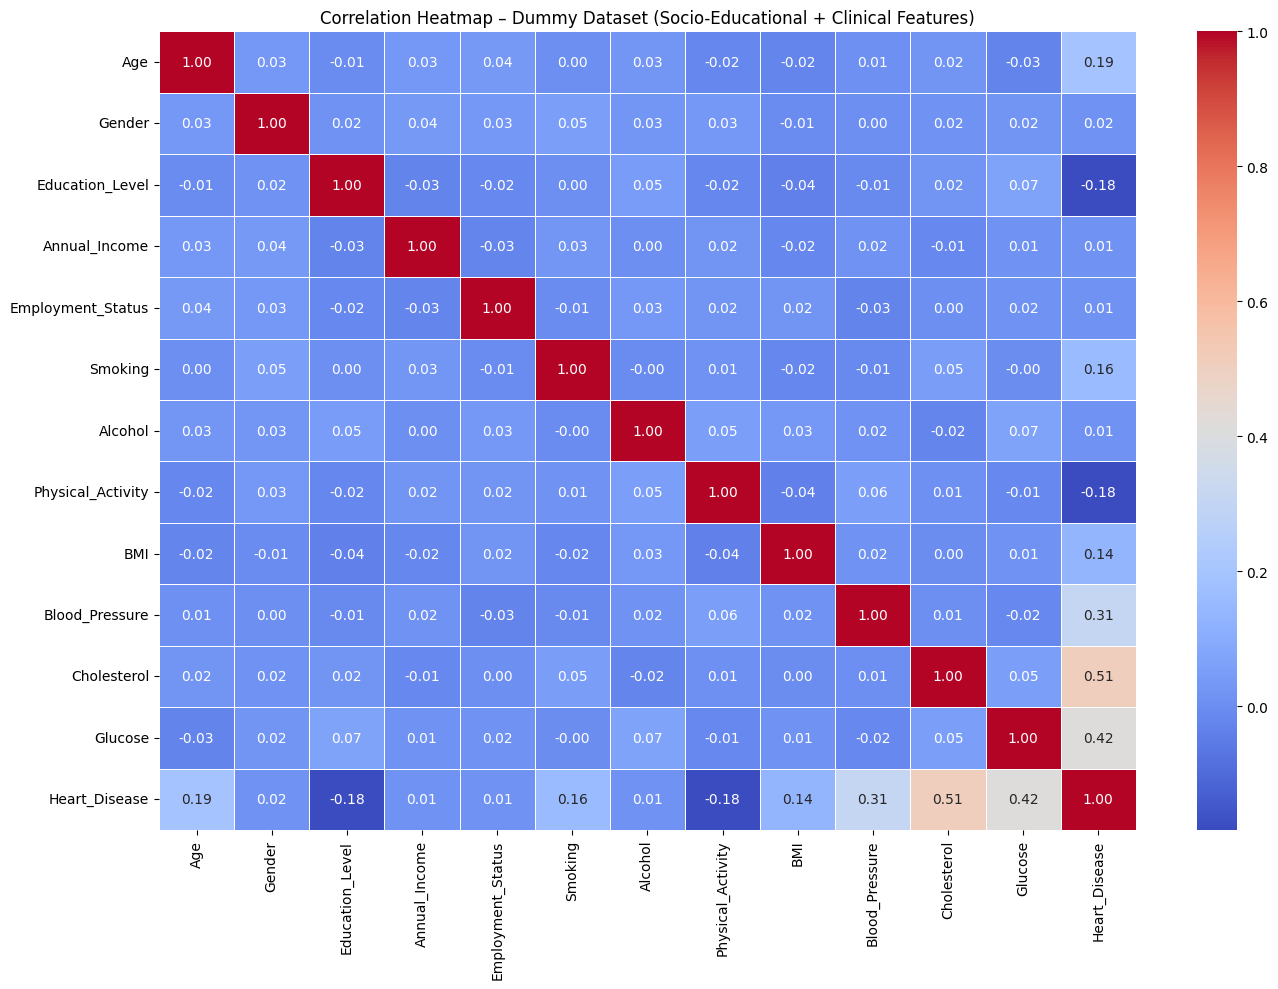

In [ ]:
correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# Load dummy dataset
df= pd.read_csv("/content/dummy_education_heart_disease.csv")

# Compute correlation matrix
corr_dummy = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_dummy,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap – Dummy Dataset (Socio-Educational + Clinical Features)")
plt.tight_layout()
plt.show()


In [ ]:

df = pd.read_csv("/content/dummy_education_heart_disease.csv")
print(df['Gender'].value_counts())
print(df['Education_Level'].value_counts())
print(df['Employment_Status'].value_counts())
print(df['Smoking'].value_counts())
print(df['Alcohol'].value_counts())
print(df['Physical_Activity'].value_counts())

Gender
0    604
1    596
Name: count, dtype: int64
Education_Level
1    420
2    318
0    296
3    166
Name: count, dtype: int64
Employment_Status
1    944
0    256
Name: count, dtype: int64
Smoking
0    790
1    410
Name: count, dtype: int64
Alcohol
0    864
1    336
Name: count, dtype: int64
Physical_Activity
1    496
0    376
2    328
Name: count, dtype: int64


/tmp/ipython-input-3599367933.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


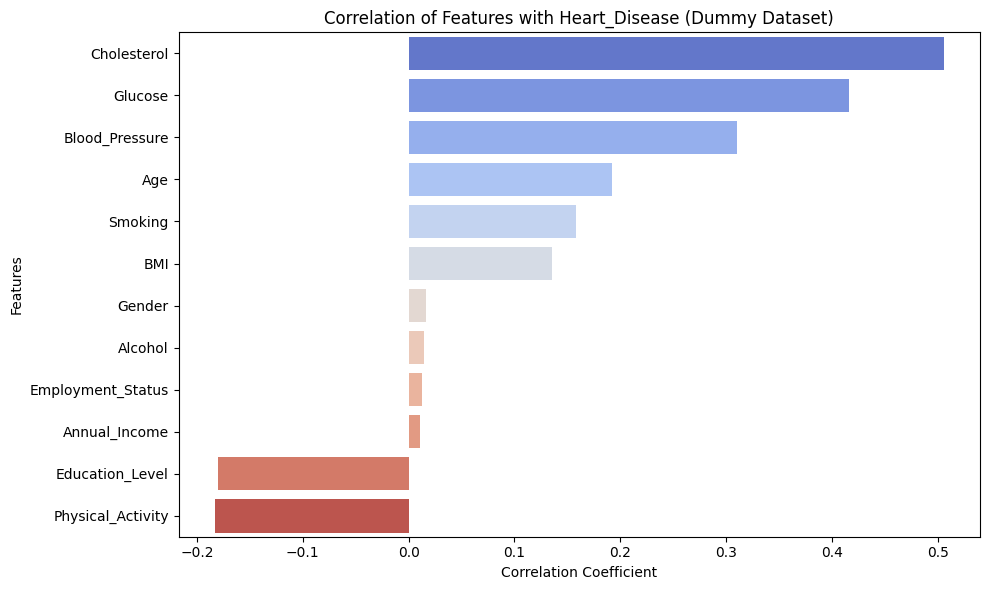

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlations with 'Heart_Disease'
correlations = df.corr()['Heart_Disease'].drop('Heart_Disease')

# Sort correlations for better visualization
correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlation of Features with Heart_Disease (Dummy Dataset)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

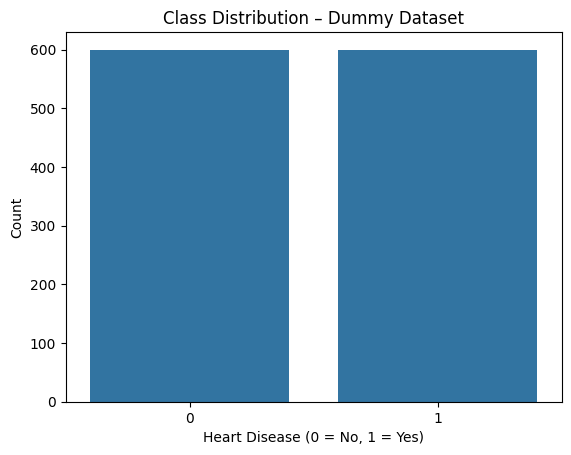

In [ ]:
sns.countplot(x="Heart_Disease", data=df)
plt.title("Class Distribution – Dummy Dataset")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load dummy dataset
df = pd.read_csv("/content/dummy_education_heart_disease.csv")

X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier()  # Add KNN model
}

for name, model in models.items():
    # Apply scaling for models that benefit from it (Logistic Regression, SVM, KNN)
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else: # Random Forest does not typically require scaling
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1:", f1_score(y_test, preds))


Logistic Regression
Accuracy: 0.9875
Precision: 0.975609756097561
Recall: 1.0
F1: 0.9876543209876543

SVM
Accuracy: 0.9583333333333334
Precision: 0.9435483870967742
Recall: 0.975
F1: 0.9590163934426229

Random Forest
Accuracy: 0.9291666666666667
Precision: 0.9327731092436975
Recall: 0.925
F1: 0.9288702928870293

KNN
Accuracy: 0.8208333333333333
Precision: 0.7894736842105263
Recall: 0.875
F1: 0.8300395256916996


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("/content/dummy_education_heart_disease.csv")

X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, C=1.5)
lr.fit(X_train_s, y_train)
print("\nLogistic Regression\n", classification_report(y_test, lr.predict(X_test_s)))

# SVM
svm = SVC(kernel="rbf", C=3, gamma="scale")
svm.fit(X_train_s, y_train)
print("\nSVM\n", classification_report(y_test, svm.predict(X_test_s)))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
print("\nRandom Forest\n", classification_report(y_test, rf.predict(X_test)))

# KNN
knn = KNeighborsClassifier(n_neighbors=5) # Example: using 5 neighbors
knn.fit(X_train_s, y_train)
print("\nKNN\n", classification_report(y_test, knn.predict(X_test_s)))


Logistic Regression
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       120
           1       0.98      1.00      0.99       120

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240


SVM
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       120
           1       0.95      0.97      0.96       120

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240


Random Forest
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.93      0.92      0.92       120

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.92       240
weighted avg       0.93      0

In [ ]:
# with tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("/content/dummy_education_heart_disease.csv")

X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, C=1.5)
lr.fit(X_train_s, y_train)
print("\nLogistic Regression\n", classification_report(y_test, lr.predict(X_test_s)))

# SVM
svm = SVC(kernel="rbf", C=3, gamma="scale")
svm.fit(X_train_s, y_train)
print("\nSVM\n", classification_report(y_test, svm.predict(X_test_s)))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
print("\nRandom Forest\n", classification_report(y_test, rf.predict(X_test)))

# KNN
knn = KNeighborsClassifier(n_neighbors=5) # Example: using 5 neighbors
knn.fit(X_train_s, y_train)
print("\nKNN\n", classification_report(y_test, knn.predict(X_test_s)))


Logistic Regression
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       120
           1       0.98      1.00      0.99       120

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240


SVM
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       120
           1       0.95      0.97      0.96       120

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240


Random Forest
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       120
           1       0.93      0.92      0.92       120

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.92       240
weighted avg       0.93      0

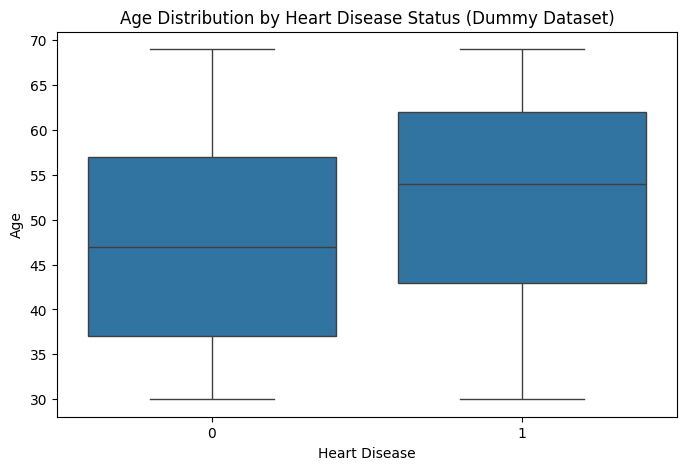

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Heart_Disease", y="Age", data=df)
plt.title("Age Distribution by Heart Disease Status (Dummy Dataset)")
plt.xlabel("Heart Disease")
plt.ylabel("Age")
plt.show()


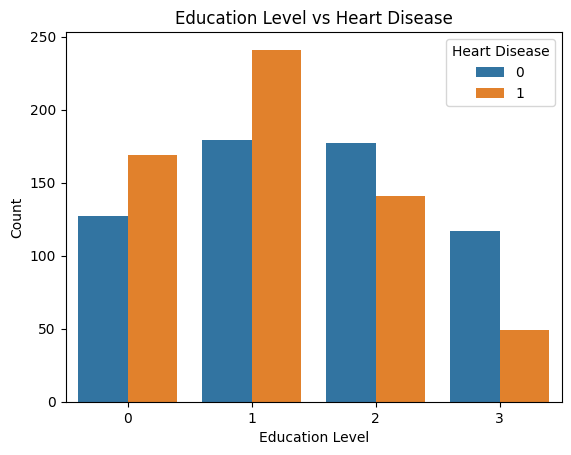

In [ ]:
sns.countplot(
    x="Education_Level",
    hue="Heart_Disease",
    data=df
)
plt.title("Education Level vs Heart Disease")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


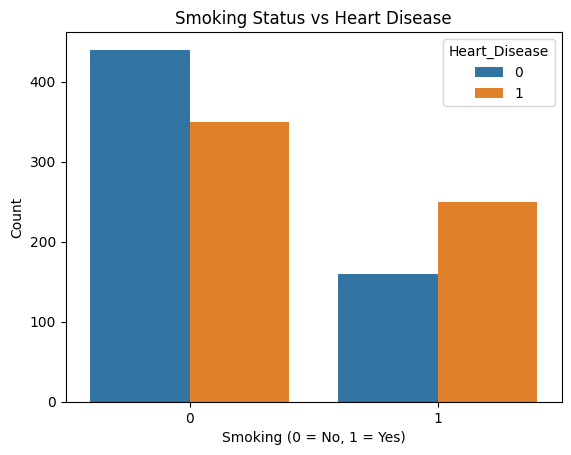

In [ ]:
sns.countplot(
    x="Smoking",
    hue="Heart_Disease",
    data=df
)
plt.title("Smoking Status vs Heart Disease")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3313958532.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


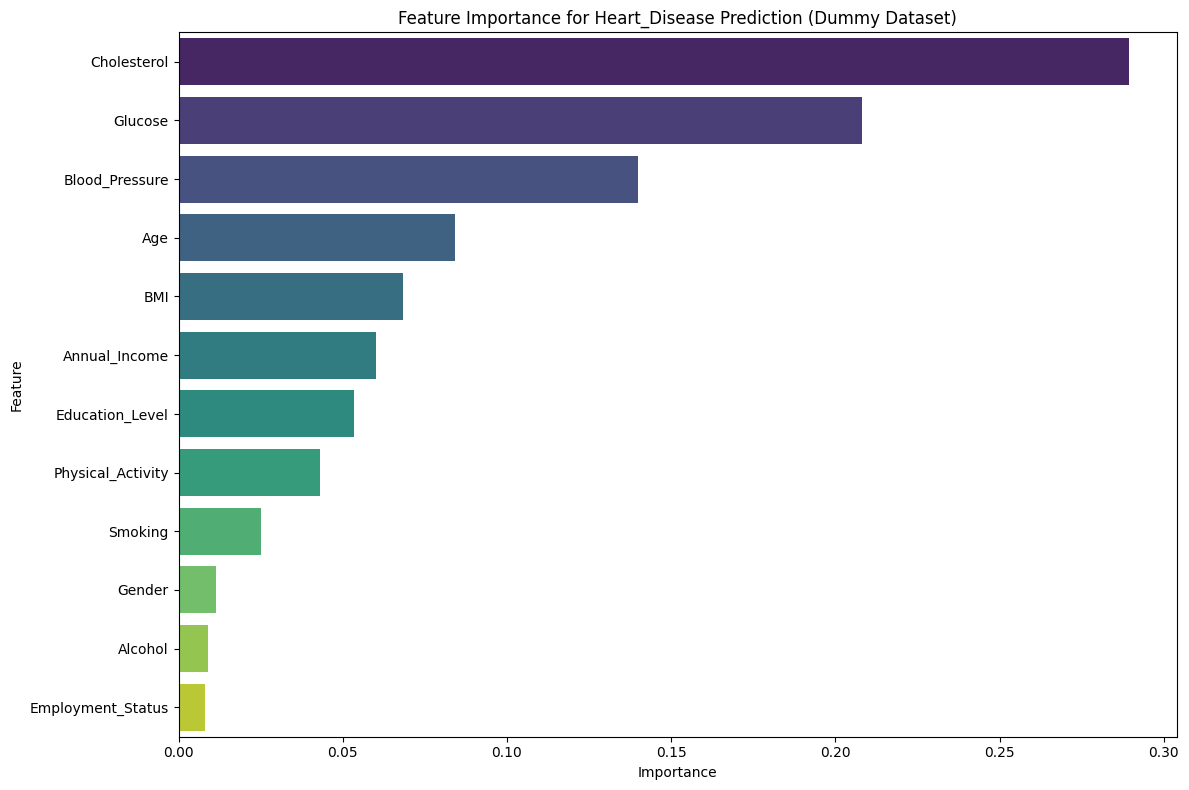

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dummy dataset
df = pd.read_csv("/content/dummy_education_heart_disease.csv")

# Separate features (X) and target (y)
X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

# Initialize and train a RandomForestClassifier
# Random Forest is chosen because it inherently provides feature importances
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance for Heart_Disease Prediction (Dummy Dataset)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Load real dataset
df_mendeley = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")





In [ ]:
print(df_mendeley.head())
print(df_mendeley.columns)


   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

In [ ]:
print(df_mendeley.isna().sum())
print(df_mendeley.info())
print(df_mendeley.describe())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 no

In [ ]:
print(df_mendeley['gender'].value_counts())
print(df_mendeley['chestpain'].value_counts())
print(df_mendeley['fastingbloodsugar'].value_counts())
print(df_mendeley['restingrelectro'].value_counts())
print(df_mendeley['exerciseangia'].value_counts())
print(df_mendeley['oldpeak'].value_counts())
print(df_mendeley['slope'].value_counts())
print(df_mendeley['noofmajorvessels'].value_counts())

gender
1    765
0    235
Name: count, dtype: int64
chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64
fastingbloodsugar
0    704
1    296
Name: count, dtype: int64
restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64
exerciseangia
0    502
1    498
Name: count, dtype: int64
oldpeak
2.4    35
1.8    31
3.2    30
1.9    29
1.0    28
       ..
5.8     7
6.2     6
4.6     6
4.0     3
3.0     2
Name: count, Length: 63, dtype: int64
slope
2    322
1    299
3    199
0    180
Name: count, dtype: int64
noofmajorvessels
1    344
0    275
2    265
3    116
Name: count, dtype: int64


In [ ]:
print(df_mendeley['target'].value_counts())

target
1    580
0    420
Name: count, dtype: int64


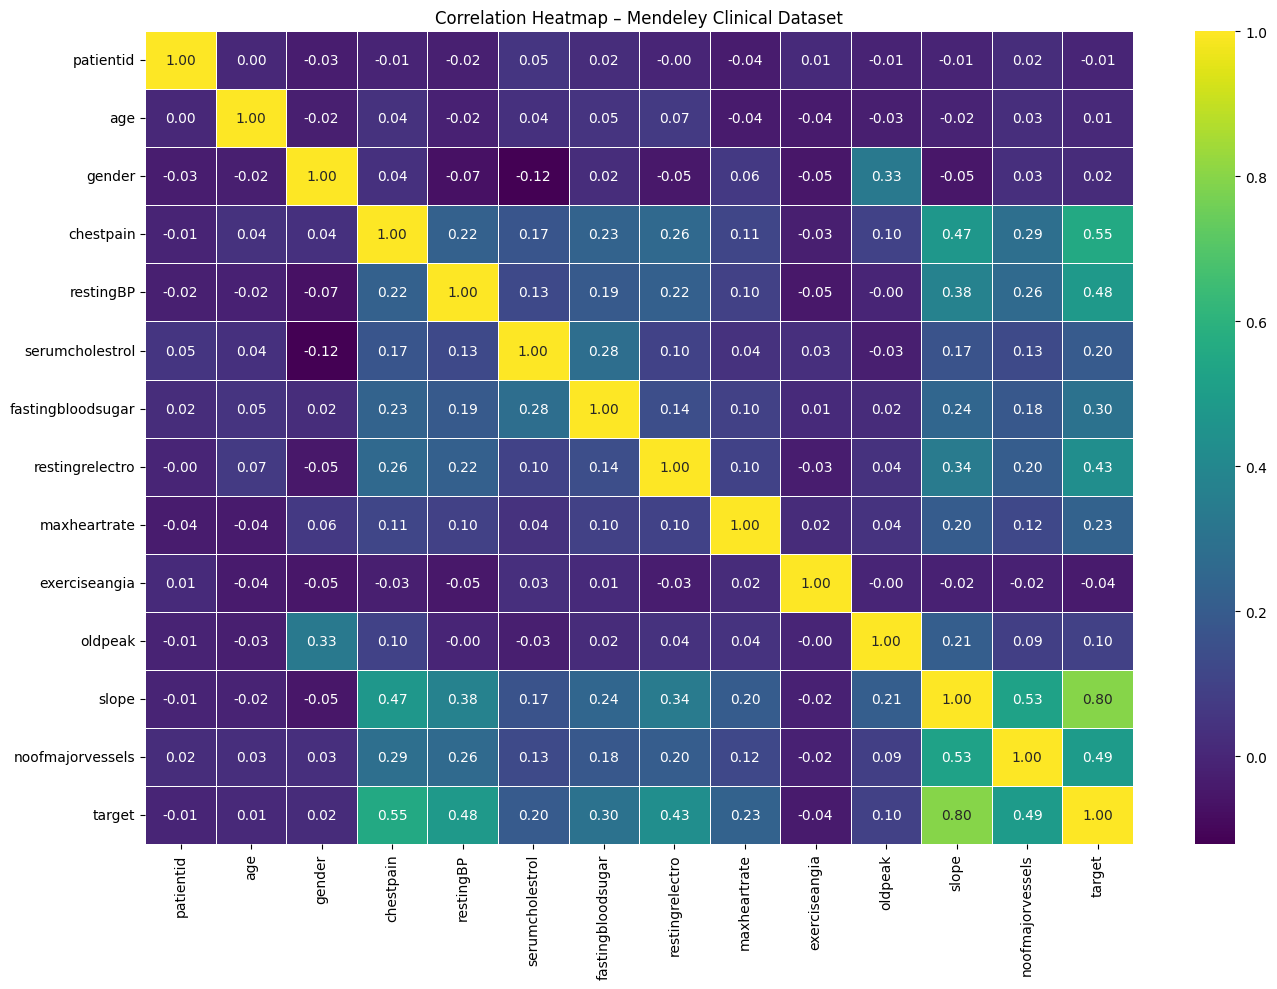

In [ ]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# Load Mendeley dataset
df_mendeley = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")
#df_mendeley.sum()

# Compute correlation matrix
corr_mendeley = df_mendeley.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_mendeley,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5
)
plt.title("Correlation Heatmap – Mendeley Clinical Dataset")
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load Mendeley dataset
df_mendeley = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")
X_real = df_mendeley.drop("target", axis=1)
y_real = df_mendeley["target"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_real, y_real, test_size=0.2, stratify=y_real, random_state=42
)

scaler = StandardScaler()
Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier()
}

print("\n--- Model Performance on Real Dataset ---\n")
for name, model in models.items():
    # Apply scaling for models that benefit from it (Logistic Regression, SVM, KNN)
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(Xr_train_scaled, yr_train)
        preds = model.predict(Xr_test_scaled)
    else: # Random Forest does not typically require scaling
        model.fit(Xr_train, yr_train)
        preds = model.predict(Xr_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(yr_test, preds))
    print("Precision:", precision_score(yr_test, preds))
    print("Recall:", recall_score(yr_test, preds))
    print("F1:", f1_score(yr_test, preds))
    print("Classification Report:\n", classification_report(yr_test, preds))


--- Model Performance on Real Dataset ---


Logistic Regression
Accuracy: 0.975
Precision: 0.9663865546218487
Recall: 0.9913793103448276
F1: 0.9787234042553191
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        84
           1       0.97      0.99      0.98       116

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200


SVM
Accuracy: 0.965
Precision: 0.957983193277311
Recall: 0.9827586206896551
F1: 0.9702127659574468
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        84
           1       0.96      0.98      0.97       116

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200


Random Forest
Accuracy: 0.985
Precis

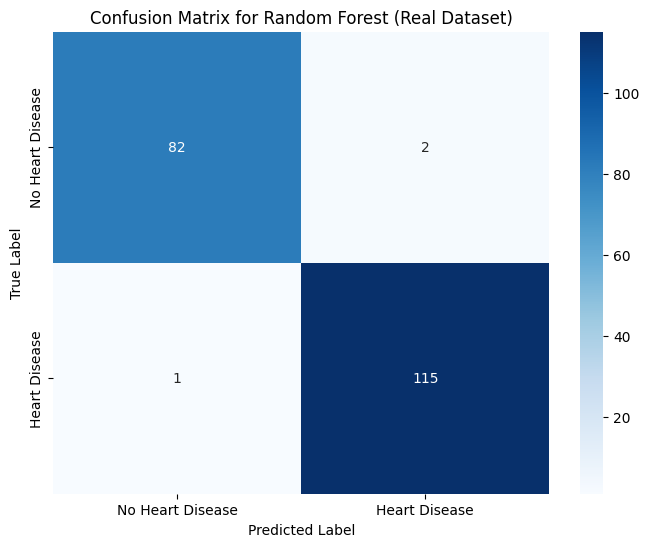

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming df_mendeley, Xr_train, Xr_test, yr_train, yr_test are already defined
# and Random Forest was identified as the best model.

# Initialize and train the Random Forest Classifier
rf_best_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_best_model.fit(Xr_train, yr_train)

# Make predictions on the test set
yr_preds_rf = rf_best_model.predict(Xr_test)

# Generate the confusion matrix
cm = confusion_matrix(yr_test, yr_preds_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Random Forest (Real Dataset)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

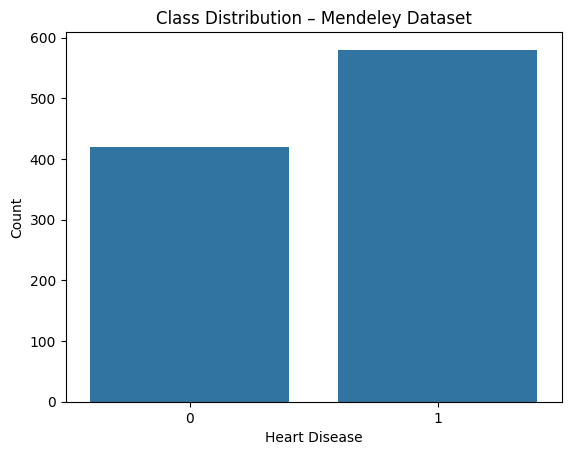

target
1    580
0    420
Name: count, dtype: int64


In [ ]:
sns.countplot(x="target", data=df_mendeley)  # change column name if needed
plt.title("Class Distribution – Mendeley Dataset")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()
print(df_mendeley["target"].value_counts())

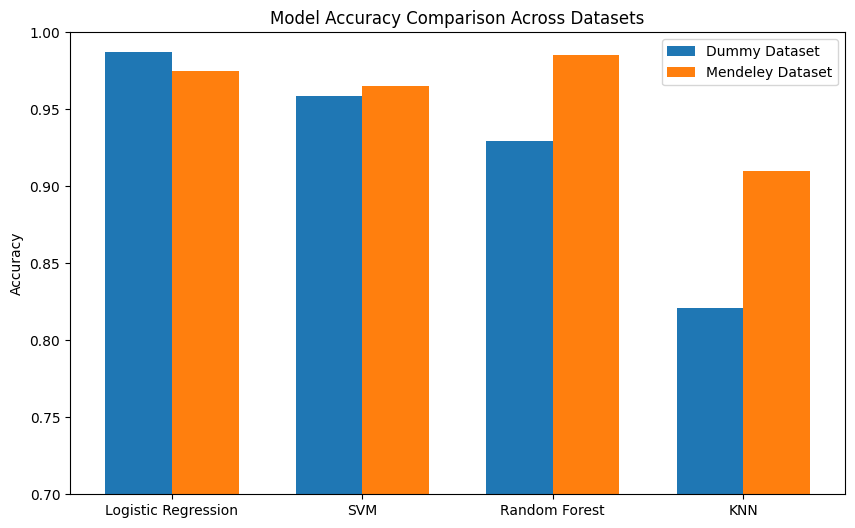

In [ ]:
models = ["Logistic Regression", "SVM", "Random Forest", "KNN"]
accuracy_dummy = [0.9875, 0.9583, 0.9291, 0.8208]
accuracy_mendeley = [0.975, 0.965, 0.985, 0.91]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, accuracy_dummy, width, label="Dummy Dataset")
plt.bar(x + width/2, accuracy_mendeley, width, label="Mendeley Dataset")

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison Across Datasets")
plt.legend()
plt.ylim(0.7, 1.0)
plt.show()
